# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

##### Question 1

256


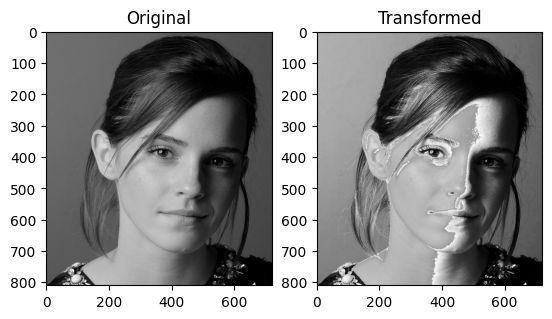

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Breakpoints from the graph (input, output)
c = np.array([(50, 50), (150, 255), (150, 150)])

# Create a lookup table (LUT) based on the breakpoints
# The LUT will map input pixel values to output pixel values
t1 = np.linspace(0, c[0,1], c[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0], dtype=np.uint8)
t3 = np.linspace(c[2,1] + 1, 255, 255 - c[2,0], dtype=np.uint8)

# Concatenate segments to form the complete LUT
# Each segment corresponds to a range of input pixel values
transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
print(len(transform))  

# Load image (grayscale)
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed')
plt.show()


##### Question 2

256
256


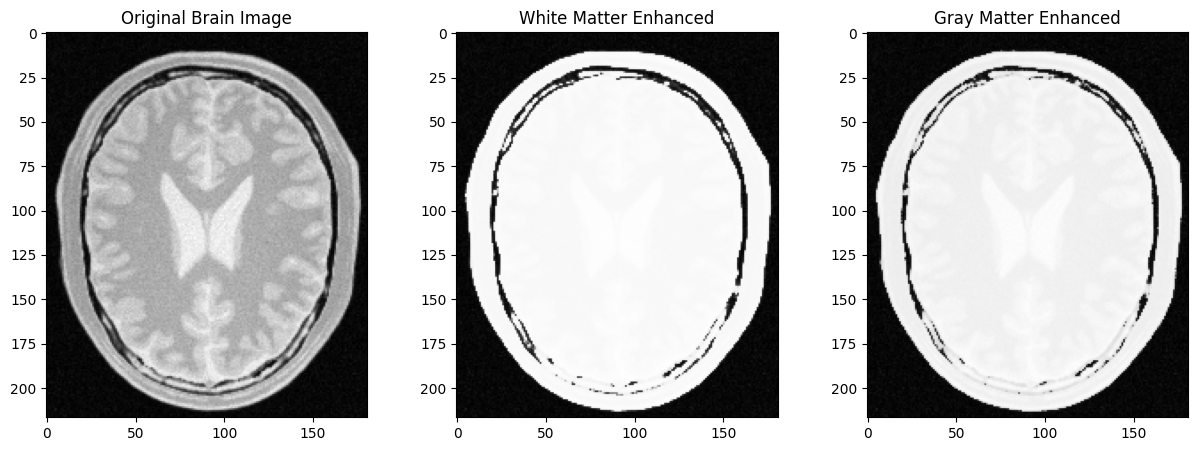

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# (a) Enhance white matter (approximate range 60-80)
c_white = np.array([(60, 60), (80, 240)])  # Steep increase from 60 to 240 over 60-80
t1_white = np.linspace(0, c_white[0,1], c_white[0,0] + 1 - 0).astype('uint8')  # 0 to 60
t2_white = np.linspace(c_white[0,1] + 1, c_white[1,1], c_white[1,0] - c_white[0,0]).astype('uint8')  # 60 to 240
t3_white = np.linspace(c_white[1,1] + 1, 255, 255 - c_white[1,0]).astype('uint8')  # 240 to 255

transform_white = np.concatenate((t1_white, t2_white), axis=0).astype('uint8')
transform_white = np.concatenate((transform_white, t3_white), axis=0).astype('uint8')
print(len(transform_white))  # Should be 256

# (b) Enhance gray matter (approximate range 40-60)
c_gray = np.array([(40, 40), (60, 220)])  # Steep increase from 40 to 220 over 40-60
t1_gray = np.linspace(0, c_gray[0,1], c_gray[0,0] + 1 - 0).astype('uint8')  # 0 to 40
t2_gray = np.linspace(c_gray[0,1] + 1, c_gray[1,1], c_gray[1,0] - c_gray[0,0]).astype('uint8')  # 40 to 220
t3_gray = np.linspace(c_gray[1,1] + 1, 255, 255 - c_gray[1,0]).astype('uint8')  # 220 to 255

transform_gray = np.concatenate((t1_gray, t2_gray), axis=0).astype('uint8')
transform_gray = np.concatenate((transform_gray, t3_gray), axis=0).astype('uint8')
print(len(transform_gray))  # Should be 256

# Load and transform the brain image
img_orig = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed_white = cv.LUT(img_orig, transform_white)
image_transformed_gray = cv.LUT(img_orig, transform_gray)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_orig, cmap='gray'), plt.title('Original Brain Image')
plt.subplot(132), plt.imshow(image_transformed_white, cmap='gray'), plt.title('White Matter Enhanced')
plt.subplot(133), plt.imshow(image_transformed_gray, cmap='gray'), plt.title('Gray Matter Enhanced')
plt.show()